In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("Penyakit_Daun_Tomat.csv")
df.head(20)

,Label,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,0,0.512010,1.538101,256,32.732300,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,32.732300,62.722290,47.810425,41.878233,54.701377,68.370310,374.907715,0.944756,0.589265,6.974358
1,0,0.460386,1.628602,256,36.499680,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,36.499680,64.207001,47.706192,46.426907,59.065576,78.204849,310.808608,0.963378,0.660421,5.706767
2,0,0.577708,1.399297,256,34.746140,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,34.746140,51.835480,41.225235,49.798417,55.163932,65.236189,433.304469,0.934723,0.662497,5.928798
3,0,0.509184,1.437618,256,32.657318,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,32.657318,51.374893,37.514542,46.463834,53.054514,71.920321,172.959072,0.975834,0.736939,4.425270
4,0,0.433251,1.641933,256,43.915863,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,43.915863,61.066437,49.749146,52.090534,58.840809,71.841022,173.507494,0.978436,0.656451,5.440395
5,0,0.643886,1.169063,256,28.054565,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,28.054565,40.863373,33.946793,42.007505,48.915560,57.502552,297.367023,0.940166,0.697995,5.285666
6,0,0.575824,1.244305,256,28.687454,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,28.687454,43.772598,33.137985,40.548729,46.708753,61.066526,134.504864,0.974448,0.729616,4.451119
7,0,0.497882,1.459157,256,35.887177,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,35.887177,59.381363,44.339142,41.256990,50.494232,66.263110,215.567087,0.965289,0.620981,6.049041
8,0,0.622243,1.103303,256,23.605148,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,23.605148,34.244492,26.753448,40.397033,45.753268,58.215424,119.068839,0.974647,0.808275,3.338848
9,0,0.605578,1.313006,256,30.457855,65025.0,1020.000000,0.992203,1.000000,65025.0,1.0,1.007859,16.000000,287.736688,30.457855,48.303024,37.248032,46.315663,52.743223,64.443927,391.906119,0.936255,0.686376,5.555932


In [3]:
# Memisahkan Fitur dan Target
Fitur = df.drop('Label', axis=1)
Target = df['Label']

Fitur.head(10)

,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,0.512010,1.538101,256,32.732300,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,32.732300,62.722290,47.810425,41.878233,54.701377,68.370310,374.907715,0.944756,0.589265,6.974358
1,0.460386,1.628602,256,36.499680,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,36.499680,64.207001,47.706192,46.426907,59.065576,78.204849,310.808608,0.963378,0.660421,5.706767
2,0.577708,1.399297,256,34.746140,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,34.746140,51.835480,41.225235,49.798417,55.163932,65.236189,433.304469,0.934723,0.662497,5.928798
3,0.509184,1.437618,256,32.657318,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,32.657318,51.374893,37.514542,46.463834,53.054514,71.920321,172.959072,0.975834,0.736939,4.425270
4,0.433251,1.641933,256,43.915863,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,43.915863,61.066437,49.749146,52.090534,58.840809,71.841022,173.507494,0.978436,0.656451,5.440395
5,0.643886,1.169063,256,28.054565,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,28.054565,40.863373,33.946793,42.007505,48.915560,57.502552,297.367023,0.940166,0.697995,5.285666
6,0.575824,1.244305,256,28.687454,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,28.687454,43.772598,33.137985,40.548729,46.708753,61.066526,134.504864,0.974448,0.729616,4.451119
7,0.497882,1.459157,256,35.887177,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,35.887177,59.381363,44.339142,41.256990,50.494232,66.263110,215.567087,0.965289,0.620981,6.049041
8,0.622243,1.103303,256,23.605148,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,23.605148,34.244492,26.753448,40.397033,45.753268,58.215424,119.068839,0.974647,0.808275,3.338848
9,0.605578,1.313006,256,30.457855,65025.0,1020.0,0.992203,1.0,65025.0,1.0,1.007859,16.0,287.736688,30.457855,48.303024,37.248032,46.315663,52.743223,64.443927,391.906119,0.936255,0.686376,5.555932


In [4]:
# Menampilkan Missing Value per atribut
print("Missing value per atribut:")
print(Fitur.isnull().sum())

Missing value per atribut:
gaborenergy                   0
gaborentropy                  0
width                         0
Height                        0
area                          0
perimeter                     0
Extent                        0
Solidity                      0
Hull_Area                     0
AspectRatio                   0
Rectangularity                0
Circularity                   0
EquiDimeter                   0
RedMean                       0
GreenMean                     0
BlueMean                      0
RedVar                        0
BlueVar                       0
GreenVar                      0
contrast                      0
correlation                   0
inverse difference moments    0
entropy                       0
dtype: int64


In [5]:
# Menampilkan baris yang duplikat
duplikat = Fitur[Fitur.duplicated()]
print("Data duplikat:")
print(duplikat)

Data duplikat:
Empty DataFrame
Columns: [gaborenergy, gaborentropy, width, Height, area, perimeter, Extent, Solidity, Hull_Area, AspectRatio, Rectangularity, Circularity, EquiDimeter, RedMean, GreenMean, BlueMean, RedVar, BlueVar, GreenVar, contrast, correlation, inverse difference moments, entropy]
Index: []


In [6]:
scaler = StandardScaler()
Fitur_Normalisasi = scaler.fit_transform(Fitur)
Fitur_Normalisasi = pd.DataFrame(Fitur_Normalisasi, columns=Fitur.columns)
Fitur_Normalisasi.head(10)

,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
0,-0.883799,1.014782,0.325753,0.463616,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.463616,1.049129,0.970018,0.282164,0.602238,0.631505,1.521729,-0.779697,-1.410480,1.487228
1,-1.332454,1.299200,0.325753,0.812599,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.812600,1.145020,0.962452,0.821778,0.985175,1.606089,0.824622,0.544286,-0.581447,0.528980
2,-0.312828,0.578559,0.325753,0.650164,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.650164,0.345995,0.492021,1.221744,0.642825,0.320919,2.156820,-1.493048,-0.557259,0.696827
3,-0.908362,0.698992,0.325753,0.456670,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.456670,0.316247,0.222675,0.826159,0.457734,0.983304,-0.674554,1.429925,0.310067,-0.439781
4,-1.568279,1.341096,0.325753,1.499583,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,1.499583,0.942184,1.110743,1.493660,0.965453,0.975446,-0.668589,1.614892,-0.627705,0.327613
5,0.262312,-0.144999,0.325753,0.030303,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.030303,-0.362648,-0.036296,0.297500,0.094561,-0.445470,0.678439,-1.106068,-0.143677,0.210644
6,-0.329206,0.091463,0.325753,0.088930,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.088930,-0.174753,-0.095004,0.124443,-0.099075,-0.092287,-1.092761,1.331351,0.224739,-0.420241
7,-1.006586,0.766682,0.325753,0.755861,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.755862,0.833352,0.718049,0.208465,0.233082,0.422685,-0.211172,0.680150,-1.040960,0.787725
8,0.074221,-0.351664,0.325753,-0.381860,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,-0.381860,-0.790134,-0.558436,0.106448,-0.182915,-0.374826,-1.260634,1.345496,1.141201,-1.261073
9,-0.070615,0.307373,0.325753,0.252927,0.40235,0.118539,0.408684,0.313629,0.332177,-0.10965,-0.291034,-0.282653,0.37769,0.252927,0.117848,0.203330,0.808581,0.430420,0.242407,1.706595,-1.384147,-0.279043,0.414955


In [7]:
pd.set_option("display.float_format", "{:.3f}".format)
Fitur_Normalisasi.describe()

,gaborenergy,gaborentropy,width,Height,area,perimeter,Extent,Solidity,Hull_Area,AspectRatio,Rectangularity,Circularity,EquiDimeter,RedMean,GreenMean,BlueMean,RedVar,BlueVar,GreenVar,contrast,correlation,inverse difference moments,entropy
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.455,-3.195,-3.360,-2.043,-2.897,-2.772,-4.908,-7.576,-3.090,-2.646,-2.046,-1.122,-3.189,-2.043,-2.355,-1.985,-2.905,-2.742,-3.549,-2.247,-5.761,-4.135,-2.880
25%,-0.668,-0.720,0.326,-0.740,0.402,0.119,0.409,0.314,0.332,-0.110,-0.291,-0.283,0.378,-0.740,-0.716,-0.742,-0.735,-0.762,-0.677,-0.724,-0.619,-0.685,-0.692
50%,-0.002,-0.005,0.326,-0.067,0.402,0.119,0.409,0.314,0.332,-0.110,-0.291,-0.283,0.378,-0.067,-0.045,-0.091,0.010,-0.099,-0.028,-0.169,0.155,-0.013,0.042
75%,0.741,0.680,0.326,0.647,0.402,0.119,0.409,0.314,0.332,-0.110,-0.291,-0.283,0.378,0.647,0.575,0.550,0.675,0.653,0.616,0.589,0.741,0.706,0.696
max,2.968,4.051,0.326,6.630,0.402,3.891,0.409,0.314,0.332,16.463,18.845,8.777,0.378,6.630,5.415,5.548,4.785,4.391,4.183,4.187,2.103,2.669,3.990


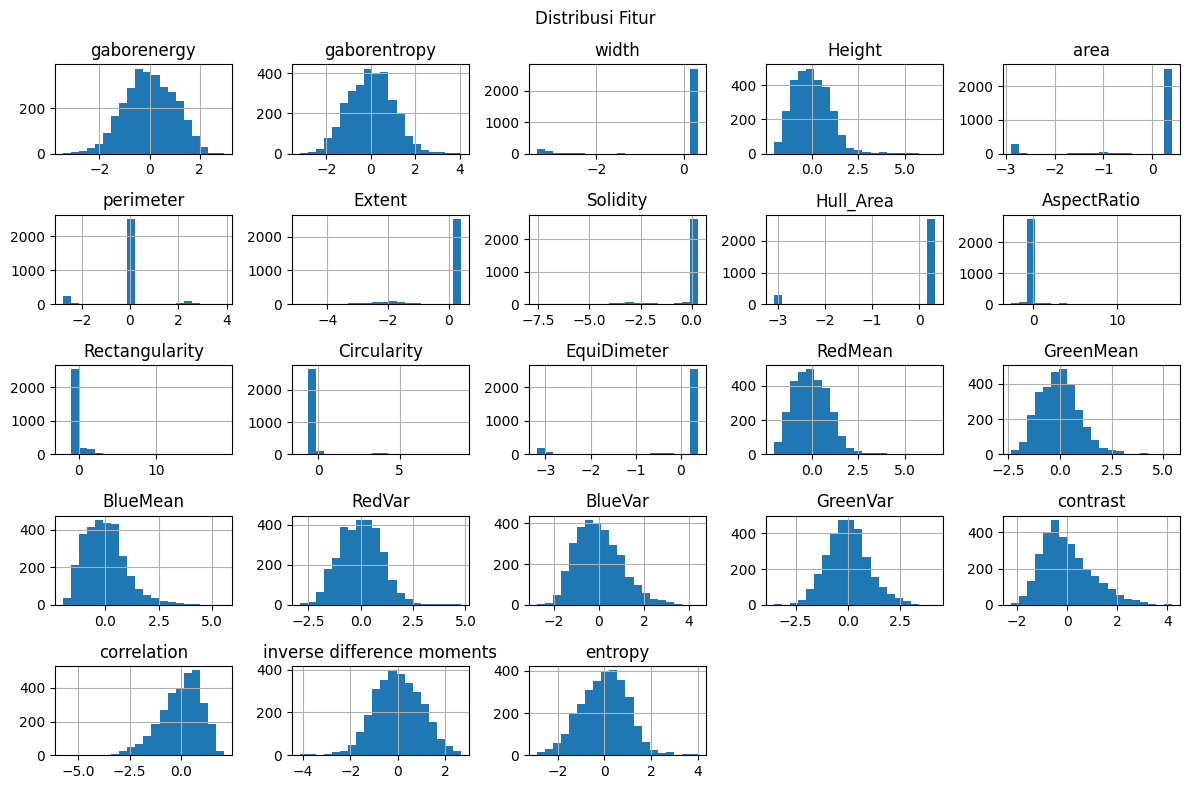

In [8]:
# Histogram per fitur
Fitur_Normalisasi.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribusi Fitur")
plt.tight_layout()
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Fitur_Normalisasi, Target, test_size=0.3, random_state=0)

Akurasi: 61.66666666666667

Classification Report:

                       precision    recall  f1-score   support

                Sehat       0.63      0.77      0.69        81
       Bercak Bakteri       0.69      0.74      0.71       103
      Hawar Daun Awal       0.54      0.50      0.52       100
     Hawar Daun Akhir       0.56      0.43      0.49       112
           Jamur Daun       0.51      0.51      0.51        97
      Bercak Septoria       0.57      0.54      0.55        78
     Tungau Laba-laba       0.51      0.59      0.55        85
        Bercak Target       0.58      0.55      0.56        80
         Virus Mosaic       0.86      0.95      0.90        76
Virus Keriting Kuning       0.74      0.70      0.72        88

             accuracy                           0.62       900
            macro avg       0.62      0.63      0.62       900
         weighted avg       0.61      0.62      0.61       900



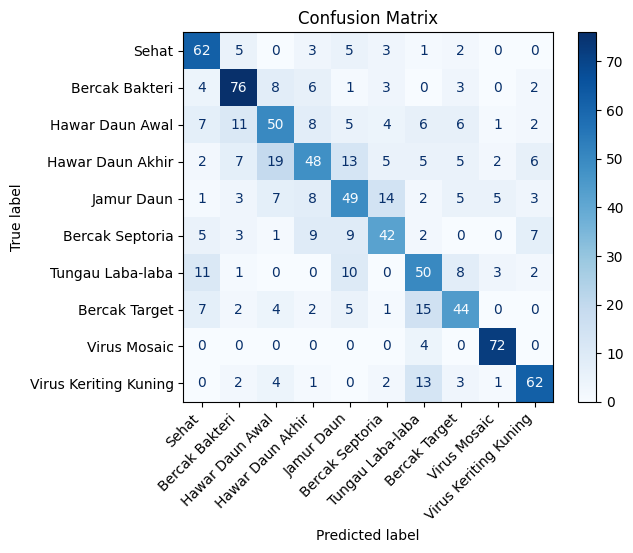

In [10]:
Target_names = ['Sehat', 'Bercak Bakteri', 'Hawar Daun Awal', 'Hawar Daun Akhir', 'Jamur Daun', 'Bercak Septoria', 'Tungau Laba-laba', 'Bercak Target', 'Virus Mosaic', 'Virus Keriting Kuning']

# Latih model
clf = svm.SVC(kernel='linear', C=0.8)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred) * 100)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=Target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.show()